# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

## Multiple Tickers Data

In the previous notebook, you learnt how to download the data for a single asset. But in most cases, you will need to retrieve the data for multiple assets at the same time. In this notebook, you will learn the same.

You will perform the following steps. You will download the:
1. [Data for Multiple Assets](#multiple-asset)
2. [Data for Assets Constituting S&P 500](#snp-500)

Note: At times, downloading the data may give you errors due to changes in yahoo finance.

In such cases, it is recommended to upgrade the `yfinance` package using `pip install --upgrade yfinance`. You can update the 'cell type' for the below from 'Raw NBConvert' to a 'Code' cell. Then restart the kernel and run all of the following cells again.

## Import Libraries

In [1]:
# For data manipulation
import pandas as pd

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

<a id='multiple-asset'></a> 
## Data for Multiple Assets

Downloading data for multiple assets is as simple as downloading the data for a single asset. This can be done by simply extending the list of tickers in the `download()` method.

Syntax:
```python
import yfinance as yf
yf.download(ticker_list, start, end)[column_name]
```

Parameters:
1. **ticker_list:** List of all tickers
2. **start:** Start date
3. **end:** End date, if not specified, data is downloaded till current data
4. **column_name:** The column to extract from the dataframe

Returns:
A `pandas` dataframe containing the open, high, low, close and adjusted close price along with the volume for all trading days between the start and the end date.

After downloading the data, you can use the `matplotlib` package to visualise the data.

In [2]:
# Define the ticker list
tickers_list = ['AAPL', 'AMZN', 'MSFT']

# Download the data for the above tickers and extract the Adj Close column
price_data = yf.download(tickers_list, start="2019-01-02")['Close']

# Set the index to a datetime object
price_data.index = pd.to_datetime(price_data.index)

# Display the first 5 rows
price_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,AMZN,MSFT
Date,,,
2019-01-02,37.667171,76.956497,95.119820
2019-01-03,33.915249,75.014000,91.620544
2019-01-04,35.363075,78.769501,95.881752
2019-01-07,35.284367,81.475502,96.004059
2019-01-08,35.956993,82.829002,96.700150


## Plot the Series

Since you will be visualising the price of three different assets, you can divide the entire price series by its respective first price value. This will make the changes comparable.
As you have seen, Apple, Microsoft and Amazon have different price ranges.
If you try to plot them as it is, you will find that these prices will be graphed at different magnitudes and you wouldn't observe much from that.

Hence, one way is to divide it by the first price so that we can compare them on the same scale. This helps us to compare a 100+ stock with a stock whose price is in the 1000s.

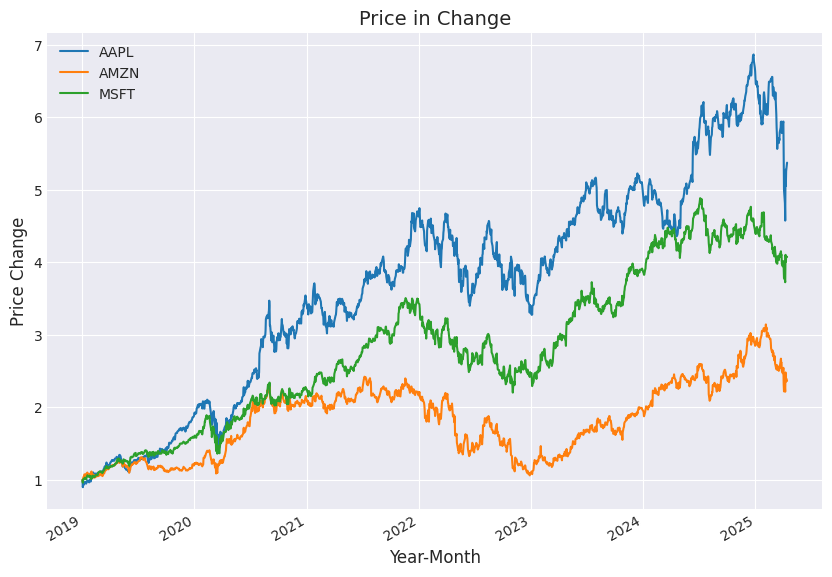

In [3]:
# Plot the absolute price series
plt.figure(figsize=(10,7))
(price_data['AAPL']/price_data['AAPL'].iloc[0]).plot()
(price_data['AMZN']/price_data['AMZN'].iloc[0]).plot()
(price_data['MSFT']/price_data['MSFT'].iloc[0]).plot()
# Set the title and axes label
plt.title('Price in Change', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price Change', fontsize=12)
plt.legend()
# Show the plot
plt.show()

<a id='snp-500'></a> 
## Data for Assets Constituting S&P 500

To download the data for all the assets that make up the S&P 500, you will first need the ticker of all the assets. You can read this information from a web source by using the `read_html` method of pandas.

Syntax:
```python
pandas.read_html(url)
```

Parameters:<br>
    **url:** url of the website (in string format)

Returns:
The above method will return a list of dataframes. You can use a proper index to extract the desired data.

You will now read the information from wikipedia

In [4]:
# url of the source
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(url)[0]

tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In the above dataframe, you can see that the tickers of the assets are stored in the column `Symbol`. You will extract this column, convert it into a list, and pass it as tickers' list into `yf.download()`.

Syntax to convert a column of a dataframe to a list:
```python
DataFrame[column].tolist()
```

Parameter:
**column:** The column to be converted into a list

<i> <span style="color:#FFFF00; background:#00C000"> The following cell fetches the price data for 500 assets. It might take time to run.</i>

In [5]:
# Covert (the ticker)'MMM' column to list
ticker_symbol = tickers['Symbol'].tolist()

# Clean the symbols
ticker_symbol = [ticker.replace(".","-") for ticker in ticker_symbol]

# Get the data for this tickers from yfinance
data = yf.download(ticker_symbol,'2021-1-1', auto_adjust=True)['Close']
data.head()

[*********************100%***********************]  503 of 503 completed


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,115.337715,126.405212,88.933968,139.149994,101.045952,33.186359,242.118484,485.339996,135.426193,44.578201,...,192.339996,27.519520,104.627151,57.374237,34.851482,94.883430,97.809006,143.842087,378.130005,158.001358
2021-01-05,116.280731,127.968086,89.853569,148.300003,102.296181,33.319485,243.496857,485.690002,137.846863,45.445274,...,190.734787,27.779530,107.847214,56.814987,36.531075,94.769218,97.818230,146.330841,380.570007,159.102417
2021-01-06,119.469429,123.660484,89.077393,142.770004,102.083176,34.783871,246.159164,466.309998,138.468277,47.286686,...,192.339996,27.922115,108.493179,58.073277,37.463242,98.766701,98.354332,150.500717,394.820007,161.439758
2021-01-07,122.648415,127.880165,90.030762,151.270004,103.074112,34.460564,248.481613,477.739990,144.320450,46.866558,...,193.803543,28.190525,107.416550,56.937332,37.757172,103.249626,97.605667,149.608475,409.100006,161.294861
2021-01-08,123.523369,128.983917,90.503242,149.770004,103.361183,34.650742,249.387939,485.100006,145.368484,46.991695,...,192.283371,27.997608,106.711868,57.461624,38.177071,102.202667,99.038300,149.279800,405.470001,162.366959


The above dataframe has the close price of all the assets that make up the S&P 500.

## Tweak the code

You can tweak the code in the following ways:

1. Use a list of assets of your choice to download the data.
2. Use a different time period to download the data.

In the next notebook, you will learn how to download minute level data and resample them.
<br><br>